# CS655: PA 1 Summary

Student: Jida Li

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

def read_data(filenames: List[str], measure_name: str) -> pd.DataFrame:
    data = {}
    
    for filename in filenames:
        # Step 1: Read the data from the txt file
        lines = []
        with open(filename, 'r') as file:
            lines = file.readlines()

        # Step 2: Parse the data to extract CLIENT value and RTT  
        for line in lines:
            if line.startswith("RESULT:"):
                parts = line.split(':')[1].strip().split(',')
                
                msg_size = int(parts[0])  # message size
                value = float(parts[-1])  # rtt/tput value
                
                data.setdefault(msg_size, []).append(value)

    # Step 3: Create a pandas DataFrame for easier manipulation
    msg_size = []
    measure_ls = []
     
    for key in data.keys():
        msg_size.append(key)
        measure_ls.append(sum(data[key]) / len(data[key]))
    
    res = pd.DataFrame({
        'MSG_SIZE': msg_size,
        measure_name: measure_ls
    }) 
    
    return res

def plot_rtt(data: pd.DataFrame, yrange, delay: str):
    plt.plot(data['MSG_SIZE'], data['RTT'], marker='o')

    # Adding labels and a title
    plt.xlabel('Message Size (bytes)')
    plt.ylabel('RTT (s)')
    plt.title(f'Message Size vs Roundtrip Time with {delay}s Delay')
    
    plt.ylim(yrange[0], yrange[1])
    plt.grid(True)

    # Display the plot
    plt.show()

def plot_tput(data: pd.DataFrame, yrange, delay: str):
    plt.plot(data['MSG_SIZE'], data['TPUT'], marker='o')

    # Adding labels and a title
    plt.xlabel('Message Size (bytes)')
    plt.ylabel('TPUT (req/s)')
    plt.title(f'Message Size vs Throughput with {delay}s Delay')
    
    plt.ylim(yrange[0], yrange[1])
    plt.grid(True)

    # Display the plot
    plt.show()
    

### TCP's RTT

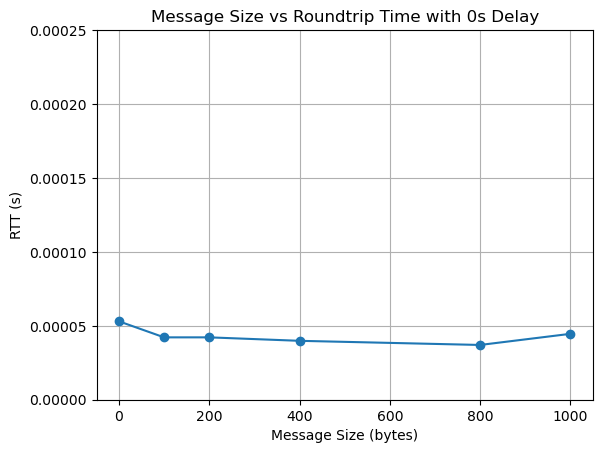

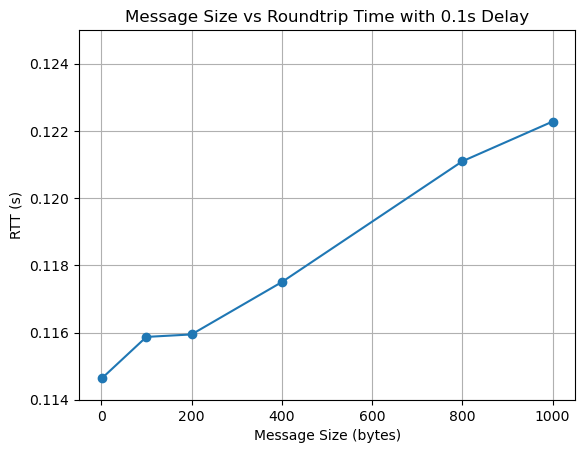

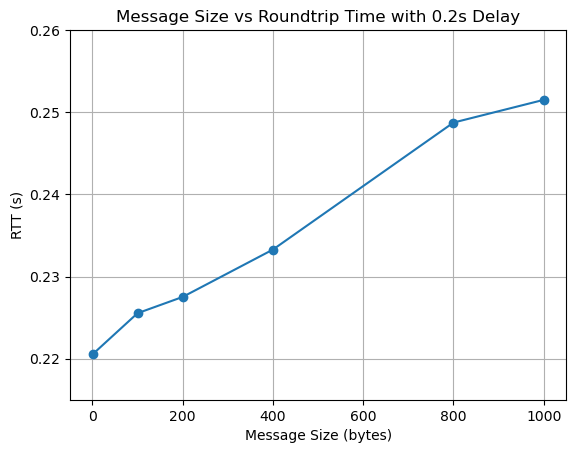

In [17]:
l0 = [
    "./data/rtt/log_client_rtt_0_delay.txt",
    "./data/log_client_rtt_0_delay_1.txt",
    "./data/log_client_rtt_0_delay_2.txt",
    # "./data/rtt/log_client_rtt_0_delay_3.txt",
    # "./data/rtt/log_client_rtt_0_delay_4.txt",
    # "./data/rtt/log_client_rtt_0_delay_5.txt",
]
data_0 = read_data(l0, "RTT")
plot_rtt(data_0, [0.00, 0.00025], "0")

l100 = [
    "./data/rtt/log_client_rtt_100_delay.txt",
    "./data/rtt/log_client_rtt_100_delay_1.txt",
    "./data/rtt/log_client_rtt_100_delay_2.txt",
    "./data/rtt/log_client_rtt_100_delay_3.txt",
]
data_100 = read_data(l100, "RTT")
plot_rtt(data_100, [0.114, 0.125], "0.1")

l200 = [
    "./data/rtt/log_client_rtt_200_delay.txt",
    "./data/rtt/log_client_rtt_200_delay_1.txt",
    "./data/rtt/log_client_rtt_200_delay_2.txt",
    "./data/rtt/log_client_rtt_200_delay_3.txt",
]
data_200 = read_data(l200, "RTT")
plot_rtt(data_200, [0.215, 0.26], "0.2")

### TCP's Throughput

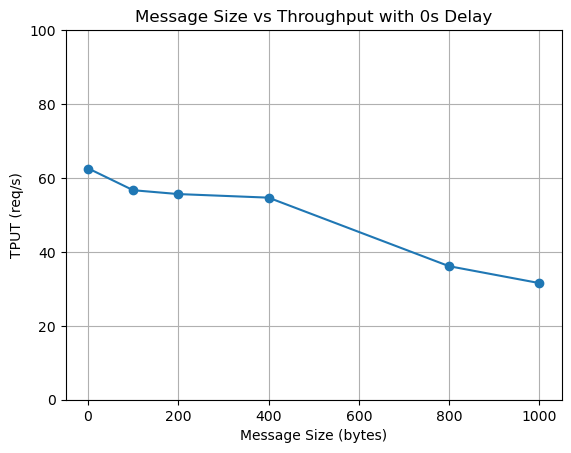

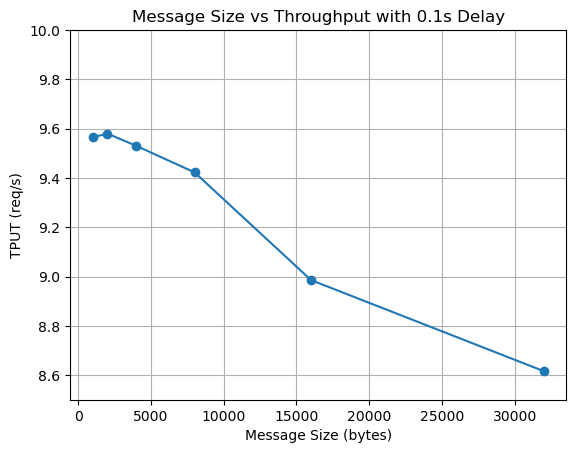

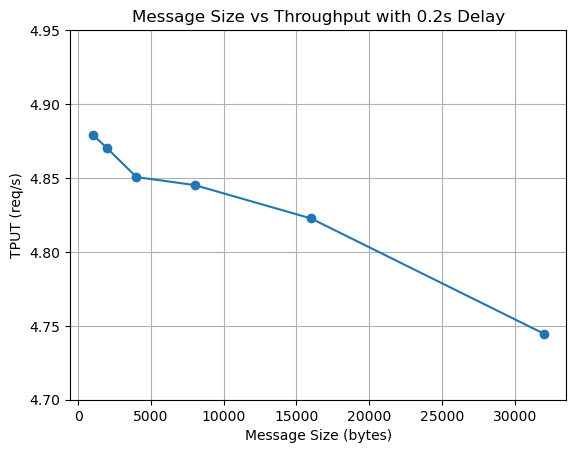

In [27]:
tput0 = ['./data/log_client_tput_0_delay.txt']
data_0 = read_data(tput0, "TPUT")
plot_tput(data_0, [0, 100],'0')

tput100 = ['./data/log_client_tput_100_delay.txt', './data/log_client_tput_100_delay_1.txt']
data_500 = read_data(tput100, "TPUT")
plot_tput(data_500, [8.5, 10], '0.1')

tput200 = ['./data/log_client_tput_200_delay.txt']
data_1000 = read_data(tput200, "TPUT")
plot_tput(data_1000, [4.7, 4.95], '0.2')
